# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Init

In [3]:
import datahandler

import matplotlib.pyplot as plt


dataset_id = "oslo"

data_preprocessor = datahandler.DataPreprocessorOUS(dataset_id)
data_preprocessor.execute()

data_loader = datahandler.DataLoader(dataset_id)
data_loader.execute()


Loading dataset: 100%|██████████| 6/6 [00:39<00:00,  6.58s/it]


# Plot processed data

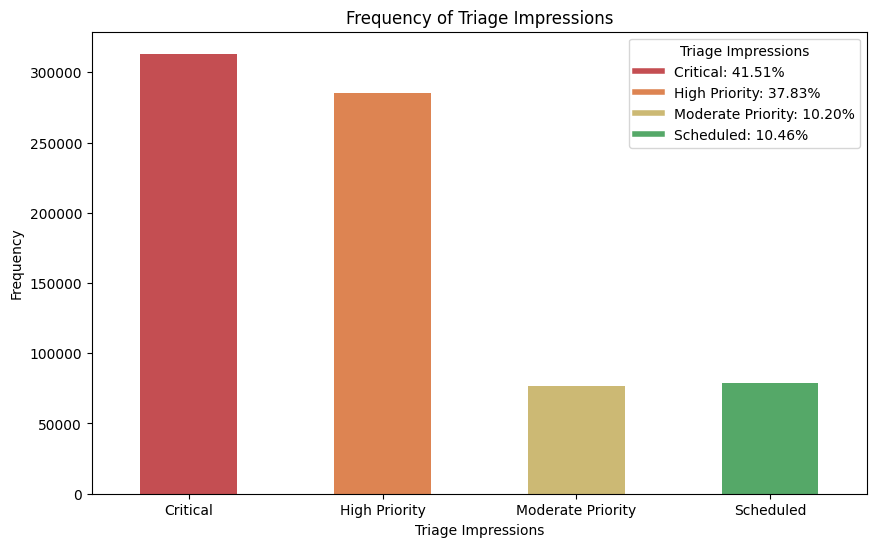

In [4]:
df = data_loader.processed_incidents_df

triage_counts = df["triage_impression_during_call"].value_counts()
triage_counts = triage_counts.reindex(constants.TRIAGE_MAPPING.values())
total = len(df)
percentages = (triage_counts / total) * 100

triage_counts.plot(kind="bar", figsize=(10,6), color=[constants.COLOR_MAPPING_DEEP[cat] for cat in triage_counts.index])
plt.title("Frequency of Triage Impressions")
plt.ylabel("Frequency")
plt.xlabel("Triage Impressions")
plt.xticks(rotation=0)
# add legend
handles = [plt.Line2D([0], [0], color=constants.COLOR_MAPPING_DEEP[cat], lw=4) for cat in triage_counts.index]
labels = [f"{cat}: {pct:.2f}%" for cat, pct in zip(triage_counts.index, percentages)]
plt.legend(handles, labels, title="Triage Impressions")

plt.show()


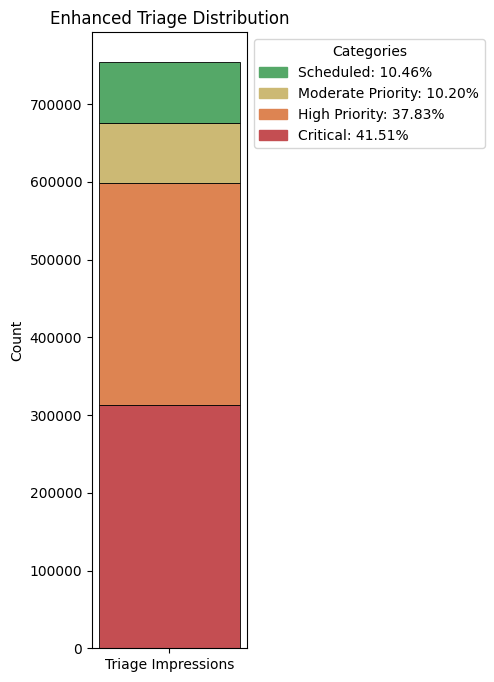

In [5]:
# Initialize variables
bottom = 0
total_count = sum([triage_counts.get(cat, 0) for cat in triage_counts.index])
legend_labels = []
legend_colors = []

plt.figure(figsize=(2, 8))

# Create the stacked bar chart
for cat in triage_counts.index:
    count = triage_counts.get(cat, 0)
    percentage = (count / total_count) * 100
    label = f"{cat}: {percentage:.2f}%"
    
    plt.bar('Triage Impressions', count, bottom=bottom, color=constants.COLOR_MAPPING_DEEP[cat], edgecolor='black', linewidth=0.6)
    bottom += count
    
    # Store labels and colors for legend
    legend_labels.append(label)
    legend_colors.append(constants.COLOR_MAPPING_DEEP[cat])

# Add labels and title
plt.yticks(range(0, bottom+1, 100000))  # Adjust the yticks as needed
plt.ylabel('Count')
plt.title('Enhanced Triage Distribution')

# Add legend
# Reverse the labels and colors to have 'A' at the bottom and 'V2' at the top in the legend
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in reversed(legend_colors)], 
           labels=reversed(legend_labels), title='Categories', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

# Plot enhanced data

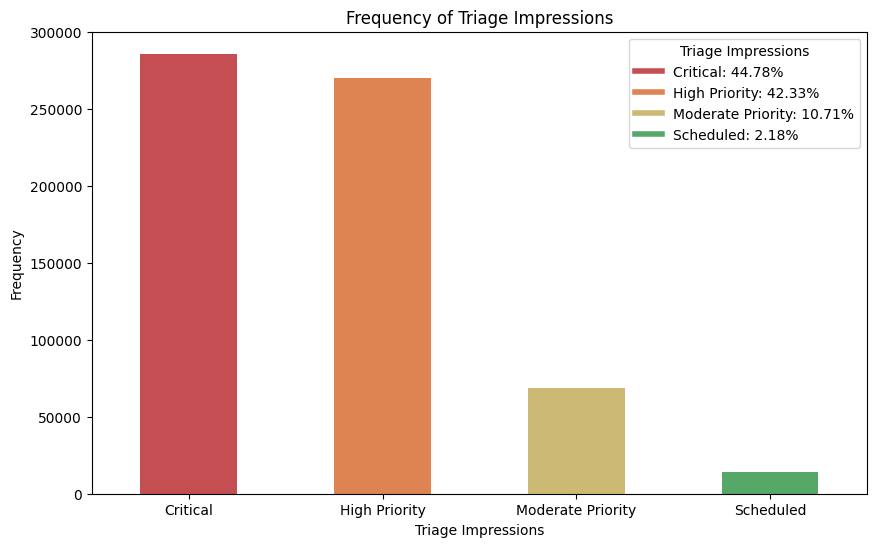

In [6]:
df = data_loader.enhanced_incidents_df

triage_counts = df["triage_impression_during_call"].value_counts()
triage_counts = triage_counts.reindex(constants.TRIAGE_MAPPING.values())

total = len(df)
percentages = (triage_counts / total) * 100

triage_counts.plot(kind="bar", figsize=(10,6), color=[constants.COLOR_MAPPING_DEEP[cat] for cat in triage_counts.index])
plt.title("Frequency of Triage Impressions")
plt.ylabel("Frequency")
plt.xlabel("Triage Impressions")
plt.xticks(rotation=0)
# add legend
handles = [plt.Line2D([0], [0], color=constants.COLOR_MAPPING_DEEP[cat], lw=4) for cat in triage_counts.index]
labels = [f"{cat}: {pct:.2f}%" for cat, pct in zip(triage_counts.index, percentages)]
plt.legend(handles, labels, title="Triage Impressions")

plt.show()

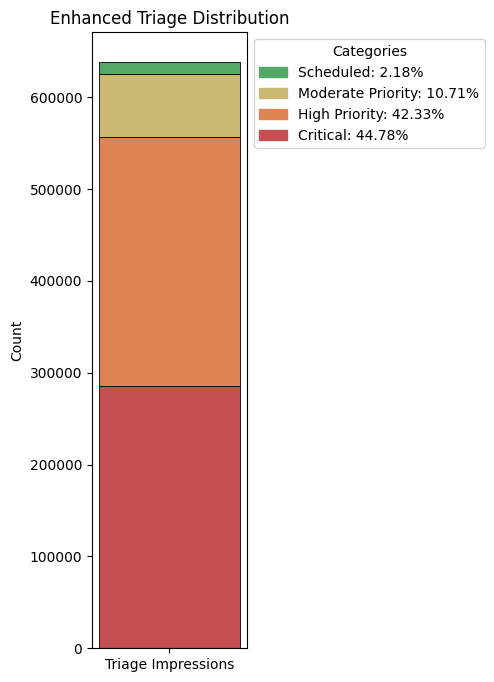

In [7]:
# Initialize variables
bottom = 0
total_count = sum([triage_counts.get(cat, 0) for cat in triage_counts.index])
legend_labels = []
legend_colors = []

plt.figure(figsize=(2, 8))

# Create the stacked bar chart
for cat in triage_counts.index:
    count = triage_counts.get(cat, 0)
    percentage = (count / total_count) * 100
    label = f"{cat}: {percentage:.2f}%"
    
    plt.bar('Triage Impressions', count, bottom=bottom, color=constants.COLOR_MAPPING_DEEP[cat], edgecolor='black', linewidth=0.6)
    bottom += count
    
    # Store labels and colors for legend
    legend_labels.append(label)
    legend_colors.append(constants.COLOR_MAPPING_DEEP[cat])

# Add labels and title
plt.yticks(range(0, bottom+1, 100000))  # Adjust the yticks as needed
plt.ylabel('Count')
plt.title('Enhanced Triage Distribution')

# Add legend
# Reverse the labels and colors to have 'A' at the bottom and 'V2' at the top in the legend
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in reversed(legend_colors)], 
           labels=reversed(legend_labels), title='Categories', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()